In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine=create_engine('mssql+pyodbc://LAPTOP-15DIP5U3\\SQLEXPRESS/PortfolioProject?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
query='SELECT * FROM NashvilleHousing'

nashville=pd.read_sql(query,engine)

In [2]:
nashville

,UniqueID,ParcelID,LandUse,PropertyAddress,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateCorrected,PropertyAge
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200,235700.0,1986.0,3,3,0,2013-04-09,39.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100,319000.0,1998.0,3,3,2,2014-06-10,27.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200,298000.0,1987.0,4,3,0,2016-09-26,38.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300,197300.0,1985.0,3,3,0,2016-01-29,40.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300,202300.0,1984.0,4,3,0,2014-10-10,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",157500,20150608-0053286,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2015-05-27,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",145000,20150304-0019013,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2015-03-02,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",234611,20160819-0087214,Yes,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2016-08-16,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",93844,20160919-0098411,Yes,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2016-09-07,NaN


In [3]:
#check uniqueid datatype
print(nashville['UniqueID'].dtypes)

int64


In [4]:
#Checking for nullvalues in UniqueID
pd.isnull(nashville['UniqueID']).sum()

0

In [5]:
print(nashville['ParcelID'].dtype)

object


In [6]:
pd.isnull(nashville['ParcelID']).sum()

0

In [7]:
#propertycity and propertystreet from propertyaddress
nashville[['PropertyStreet','PropertyCity']]=nashville['PropertyAddress'].str.split(',',expand=True)


In [8]:
#drop propertyaddress
nashville.drop(columns=['PropertyAddress'],inplace=True)

In [9]:
#setting uniqueid as index
nashville.set_index('UniqueID',inplace=True)

In [10]:
nashville

,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateCorrected,PropertyAge,PropertyStreet,PropertyCity
UniqueID,,,,,,,,,,,,,,,,,,,,
2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200,235700.0,1986.0,3,3,0,2013-04-09,39.0,1808 FOX CHASE DR,GOODLETTSVILLE
16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100,319000.0,1998.0,3,3,2,2014-06-10,27.0,1832 FOX CHASE DR,GOODLETTSVILLE
54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200,298000.0,1987.0,4,3,0,2016-09-26,38.0,1864 FOX CHASE DR,GOODLETTSVILLE
43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300,197300.0,1985.0,3,3,0,2016-01-29,40.0,1853 FOX CHASE DR,GOODLETTSVILLE
22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300,202300.0,1984.0,4,3,0,2014-10-10,41.0,1829 FOX CHASE DR,GOODLETTSVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,188 10 0A 101.00,SINGLE FAMILY,157500,20150608-0053286,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2015-05-27,NaN,1435 WINDING CREEK DR,NOLENSVILLE
27707,188 10 0A 107.00,SINGLE FAMILY,145000,20150304-0019013,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2015-03-02,NaN,1423 WINDING CREEK DR,NOLENSVILLE
52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,234611,20160819-0087214,Yes,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2016-08-16,NaN,1804 GRACE POINT LN,NOLENSVILLE


In [11]:
#saleprice dtype and null
nashville['SalePrice'].dtype

dtype('O')

In [12]:
#saleprice null
pd.isnull(nashville['SalePrice']).sum()

0

In [13]:
import numpy as np

In [14]:
#saleprice threw error on parsing to numeric, saleprice contains regex
nashville[nashville['SalePrice'].str.contains(r'\D')]

,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateCorrected,PropertyAge,PropertyStreet,PropertyCity
UniqueID,,,,,,,,,,,,,,,,,,,,
25017,025 14 0 002.00,DUPLEX,"1,20,000",20141208-0112026,No,"SMITH, DAVID A. & JULIANNE","215 DRY CREEK RD, GOODLETTSVILLE, TN",0.91,CITY OF GOODLETTSVILLE,35000.0,98300,133300.0,1973.0,4,2,0,2014-12-05,52.0,215 DRY CREEK RD,GOODLETTSVILLE
39467,042 08 0 041.00,SINGLE FAMILY,"$1,20,000",20151021-0107004,No,"KEITH, KRISTINE RENEE","412 AMQUIWOOD CT, MADISON, TN",0.23,GENERAL SERVICES DISTRICT,26000.0,95000,121000.0,1988.0,3,2,0,2015-10-19,37.0,412 AMQUIWOOD CT,MADISON
39539,071 15 0 337.00,SINGLE FAMILY,"$3,62,500",20151019-0106061,No,"WARD, SANDRA S. & DAVID S.","1219 N 2ND ST, NASHVILLE, TN",0.21,URBAN SERVICES DISTRICT,27000.0,290700,330600.0,2015.0,4,2,1,2015-10-15,10.0,1219 N 2ND ST,NASHVILLE
8996,072 07 0 214.00,SINGLE FAMILY,"1,59,900",20131016-0108203,No,"ORIO, NATALIE & ANTHONY","2929 GLENMEADE DR, NASHVILLE, TN",0.16,URBAN SERVICES DISTRICT,25000.0,104900,129900.0,1945.0,2,1,0,2013-10-11,80.0,2929 GLENMEADE DR,NASHVILLE
17845,092 16 0D 118.00,RESIDENTIAL CONDO,"$1,95,000",20140729-0067538,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2014-07-25,NaN,1803 BROADWAY,NASHVILLE
55748,118 14 0C 002.00,RESIDENTIAL CONDO,"$11,24,900",20161027-0113506,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2016-10-24,NaN,3602 BCALDWELL CT,NASHVILLE
23307,119 05 0 420.00,SINGLE FAMILY,"$1,95,000",20141126-0109341,No,"ROOT, JENNIFER E.","105 LUTIE ST, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,25000.0,137600,162600.0,2014.0,3,2,0,2014-11-25,11.0,105 LUTIE ST,NASHVILLE
1390,135 12 0B 015.00,RESIDENTIAL CONDO,"1,19,000",20130314-0025442,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2013-03-13,NaN,2134 NASHBORO BLVD,NASHVILLE
17651,161 06 0A 204.00,RESIDENTIAL CONDO,"$1,78,500",20140729-0067297,No,None,None,NaN,None,NaN,None,NaN,NaN,None,None,None,2014-07-24,NaN,1363 CROWN POINT PL,NASHVILLE


In [15]:
#saleprice contains '$' and trailing space
nashville['SalePrice']=nashville['SalePrice'].str.replace('$','',regex=False).str.strip()

In [16]:
#convert saleprice to numeric
nashville['SalePrice']=pd.to_numeric(nashville['SalePrice'],errors='coerce')

In [17]:
#replace na with default 1900
nashville['YearBuilt']=nashville['YearBuilt'].fillna(1900)

In [18]:
from datetime import datetime
currentYear=datetime.now().year
nashville['BuildingAge']=currentYear-nashville['YearBuilt']
conditions=[
    (nashville['BuildingAge']>60),
    (nashville['BuildingAge']>20 )& (nashville['BuildingAge']<=60),
    (nashville['BuildingAge']<=20)
]

labels=['Old','Moderate','New']

nashville['BuildingCondition']=np.select(conditions,labels,default='Unknown')

In [19]:
bins=[0,20,60,np.inf]
labels=['New','Moderate','Old']

nashville['BuildingCondition']=pd.cut(nashville['BuildingAge'],bins=bins,labels=labels,right=False)

In [20]:
nashville

,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateCorrected,PropertyAge,PropertyStreet,PropertyCity,BuildingAge,BuildingCondition
UniqueID,,,,,,,,,,,,,,,,,,,,,
2045,007 00 0 125.00,SINGLE FAMILY,240000.0,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,...,1986.0,3,3,0,2013-04-09,39.0,1808 FOX CHASE DR,GOODLETTSVILLE,39.0,Moderate
16918,007 00 0 130.00,SINGLE FAMILY,366000.0,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,...,1998.0,3,3,2,2014-06-10,27.0,1832 FOX CHASE DR,GOODLETTSVILLE,27.0,Moderate
54582,007 00 0 138.00,SINGLE FAMILY,435000.0,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,...,1987.0,4,3,0,2016-09-26,38.0,1864 FOX CHASE DR,GOODLETTSVILLE,38.0,Moderate
43070,007 00 0 143.00,SINGLE FAMILY,255000.0,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,...,1985.0,3,3,0,2016-01-29,40.0,1853 FOX CHASE DR,GOODLETTSVILLE,40.0,Moderate
22714,007 00 0 149.00,SINGLE FAMILY,278000.0,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,...,1984.0,4,3,0,2014-10-10,41.0,1829 FOX CHASE DR,GOODLETTSVILLE,41.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,188 10 0A 101.00,SINGLE FAMILY,157500.0,20150608-0053286,No,None,None,NaN,None,NaN,...,1900.0,None,None,None,2015-05-27,NaN,1435 WINDING CREEK DR,NOLENSVILLE,125.0,Old
27707,188 10 0A 107.00,SINGLE FAMILY,145000.0,20150304-0019013,No,None,None,NaN,None,NaN,...,1900.0,None,None,None,2015-03-02,NaN,1423 WINDING CREEK DR,NOLENSVILLE,125.0,Old
52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,234611.0,20160819-0087214,Yes,None,None,NaN,None,NaN,...,1900.0,None,None,None,2016-08-16,NaN,1804 GRACE POINT LN,NOLENSVILLE,125.0,Old


In [21]:
nashville['Price_Per_Sqft']=(nashville['LandValue'] / (nashville['Acreage'] * 43560)).round(2)

In [22]:
nashville['BuildingValue'].str.contains(r'\D',regex=True).sum()


0

In [23]:
pd.isnull(nashville['BuildingValue']).sum()

30462

In [24]:
nashville['BuildingValue']=pd.to_numeric(nashville['BuildingValue'],errors='coerce')

In [40]:
nashville['BuildingValue'] = nashville['BuildingValue'].fillna(20000)

In [42]:
pd.isnull(nashville['YearBuilt']).sum()


0

In [44]:
pd.isnull(nashville['BuildingValue']).sum()

0

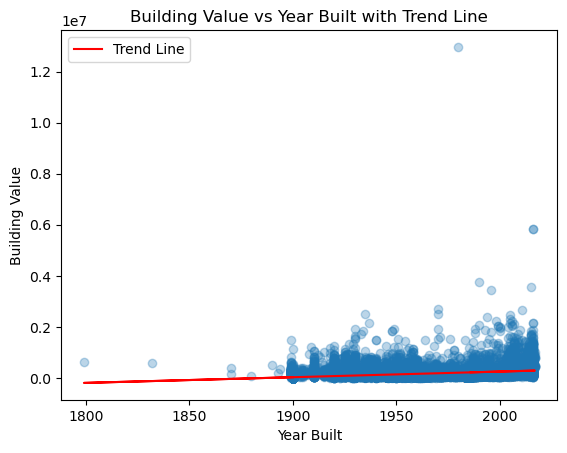

In [46]:
# Fit a linear regression model
x = nashville['YearBuilt']
y = nashville['BuildingValue']
coeffs = np.polyfit(x, y, deg=1)  # Fit a 1st-degree polynomial (linear fit)
trend_line = np.polyval(coeffs, x)  # Compute y values for the trend line

# Plot scatter plot
plt.scatter(x, y, alpha=0.3)
plt.plot(x, trend_line, color='red', label='Trend Line')  # Correct trend line
plt.title("Building Value vs Year Built with Trend Line")
plt.xlabel("Year Built")
plt.ylabel("Building Value")
plt.legend()
plt.show()
